In [1]:
### WORLD POPULATION
# df_pop = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population')[0]
# cols = df_pop.loc[0].tolist()
# df_pop.columns = cols
# df_pop = df_pop.rename(columns={'Country (or dependent territory)':'countryname', 'Population':"population"})
# df_pop = df_pop[df_pop['population']!='Population']


# cols = ['countryname','population']
# df_pop = df_pop[cols]
# df_pop['countryname'] = df_pop['countryname'].apply(lambda x:x.split("[")[0]).str.replace('Brazil','Brasil')

# df_pop.to_csv('../data/world_population.csv', index=False)

In [15]:
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

pd.options.display.max_colwidth = 100

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, offline
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import requests

from os import listdir
import unicodedata

from paths import *
from tools.vizu import remove_acentos
from tools.vizu import normalize_cols

from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')


# Jun Ye

- [Source - Github](https://github.com/Perishleaf/data-visualisation-scripts/tree/master/dash-2019-coronavirus)


# John Hopkins

- [Source - John Hopkins](https://github.com/open-covid-19/data)


In [16]:
codes = pd.read_csv('../data/country_codes.csv')
# codes = codes[['CountryCode','CountryName']].drop_duplicates()
# codes.columns = normalize(codes.columns)


df = pd.read_csv('../data/cumulative_data/covid_last.csv')
df.columns = normalize_cols(df.columns)

df = pd.merge(df,codes,on='countryname', how='left')
country_rename = {'US':'United States', 'UK':'United Kingdom', "Brazil":"Brasil"}
df['countryname'] = df['countryname'].replace(country_rename)


df_pop = pd.read_csv('../data/world_population.csv')

df = pd.merge(df,df_pop,on='countryname', how='left')
df = df[df['population'].notnull()]

df_final = df.copy()

## TOTAL

In [17]:
# df = pd.read_csv('../../covid19_open/data/output/world.csv')

df.columns = normalize_cols(df.columns)
df = df_final.copy()

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['countryname','date'])


df['confirmed_shift'] = df['confirmed'].shift(1)
df['deaths_shift'] = df['deaths'].shift(1)
df['recovered_shift'] = df['recovered'].shift(1)
df['countryname_shift'] = df['countryname'].shift(1)

df['confirmed_shift'] = np.where(df['countryname_shift']!=df['countryname'], 0 , df['confirmed_shift'])
df['new_cases'] = df['confirmed'] - df['confirmed_shift']

df['deaths_shift'] = np.where(df['countryname_shift']!=df['countryname'], 0 , df['deaths_shift'])
df['new_deaths'] = df['deaths'] - df['deaths_shift']

df['recovered_shift'] = np.where(df['countryname_shift']!=df['countryname'], 0 , df['recovered_shift'])
df['new_recovered'] = df['recovered'] - df['recovered_shift']


cols = ['date','countrycode','countryname','population','confirmed','new_cases','deaths','new_deaths','recovered','new_recovered']
df = df[cols]
df['confirmed_pop'] = df['confirmed'] / df['population'] * 10**5

df['new_confirmed_pop'] = df['new_cases'] / df['population'] * 10**5

df = df.sort_values(by=['countryname'], ascending=False)
df = df.sort_values(by=['date'])

In [18]:
mask_countrys =((df['countrycode']=='BR') | (df['countrycode']=='IT') | (df['countrycode']=='ES') | (df['countrycode']=='US') | 
                (df['countrycode']=='CN') | (df['countrycode']=='KR') | 
                (df['countrycode']=='IR') | (df['countrycode']=='DE') | (df['countrycode']=='FR') | (df['countrycode']=='FR')
               )

In [19]:
from tools.vizu import total_casos

fig,dd = total_casos(df,mask_countrys, escala='lin',var='cases',date=today, save=False)

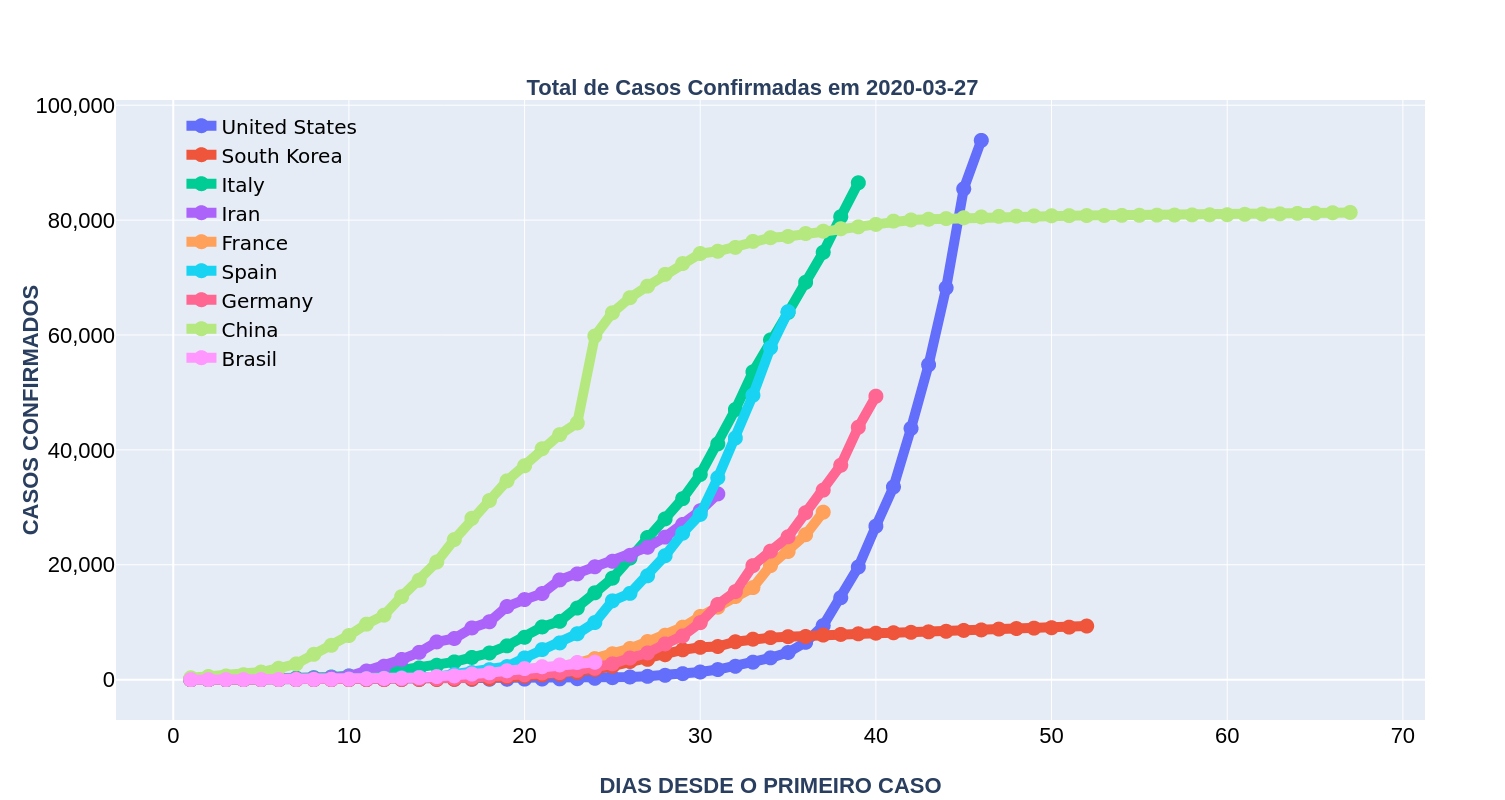

In [20]:
fig

In [21]:
for scale in ['lin','log']:
    for var in ['deaths','cases']:
        for bol in [False,True]:

            fig,dd = total_casos(df,mask_countrys, escala=scale,var=var,date=today, save=bol)

## By Country

In [22]:
# df = pd.read_csv('../../covid19_open/data/output/world.csv')

# df.columns = normalize(df.columns)
df = df_final.copy()

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['countryname','date'])


df['confirmed_shift'] = df['confirmed'].shift(1)
df['deaths_shift'] = df['deaths'].shift(1)
df['recovered_shift'] = df['recovered'].shift(1)
df['countryname_shift'] = df['countryname'].shift(1)

df['confirmed_shift'] = np.where(df['countryname_shift']!=df['countryname'], 0 , df['confirmed_shift'])
df['new_cases'] = df['confirmed'] - df['confirmed_shift']

df['deaths_shift'] = np.where(df['countryname_shift']!=df['countryname'], 0 , df['deaths_shift'])
df['new_deaths'] = df['deaths'] - df['deaths_shift']

df['recovered_shift'] = np.where(df['countryname_shift']!=df['countryname'], 0 , df['recovered_shift'])
df['new_recovered'] = df['recovered'] - df['recovered_shift']

cols = ['date','countrycode','countryname','population','confirmed','new_cases','deaths','new_deaths','recovered','new_recovered']
df = df[cols]

df['confirmed_pop'] = df['confirmed'] / df['population'] * 10**5
df['new_confirmed_pop'] = df['new_cases'] / df['population'] * 10**5

df = df.sort_values(by=['countryname'], ascending=False)
df = df.sort_values(by=['date'])

In [23]:
from tools.vizu import total_by_country

fig,dd = total_by_country(df,geoid='BR', escala='lin',var='cases', save=False, data=today)

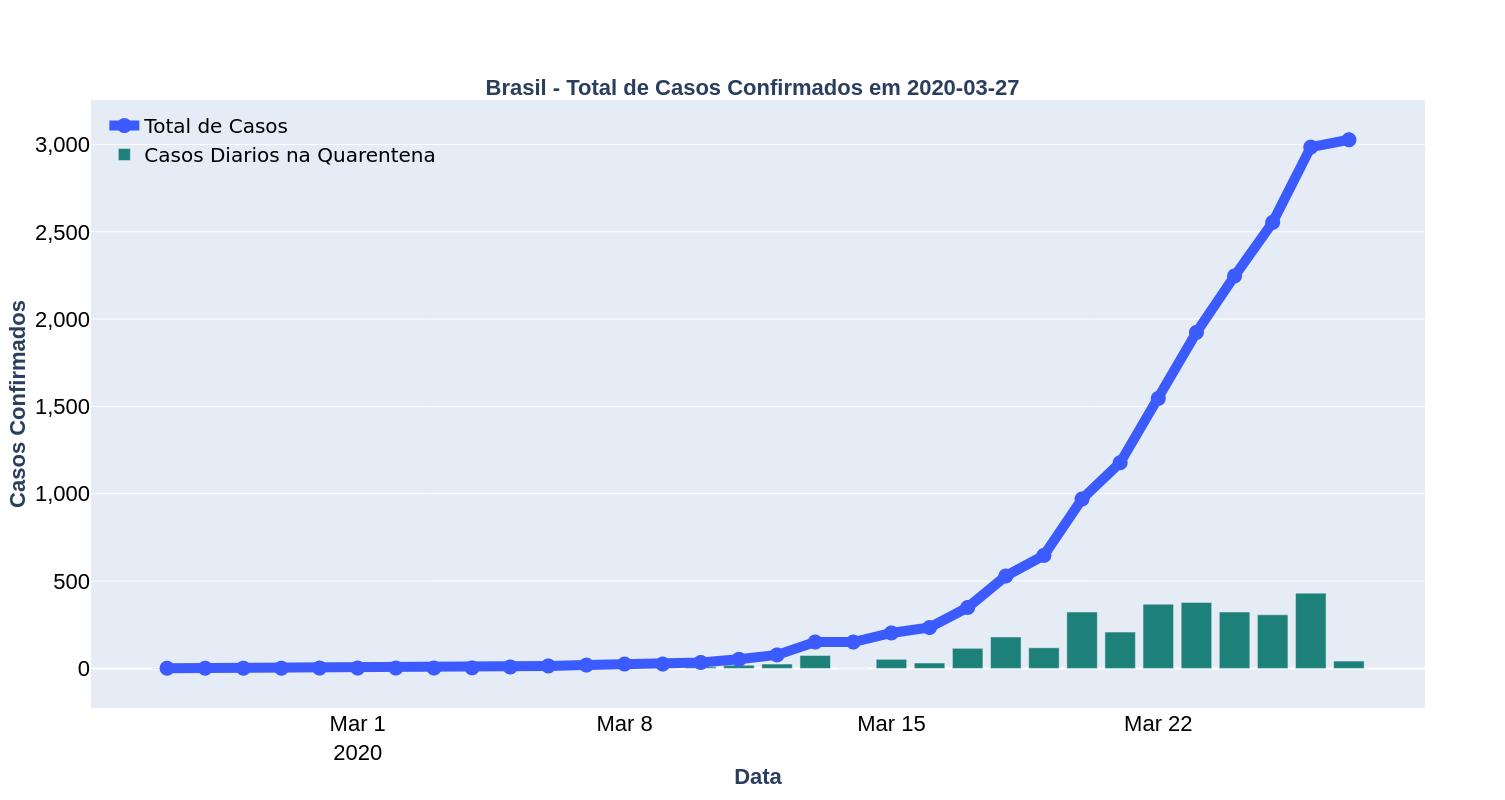

In [24]:
fig

In [25]:
for geo in ['IT','CN', 'BR','US','UK','DE','ES','FR']:
    for scale in ['lin','log']:
        for var in ['deaths','cases']:
            for bol in [False,True]:
                fig,dd = total_by_country(df,geoid=geo, escala=scale,var=var, save=bol)

## Bar Comparison

In [26]:
# df = pd.read_csv('../../covid19_open/data/output/world.csv')

# df.columns = normalize(df.columns)
df = df_final.copy()

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['countryname','date'])


df['confirmed_shift'] = df['confirmed'].shift(1)
df['deaths_shift'] = df['deaths'].shift(1)
df['recovered_shift'] = df['recovered'].shift(1)
df['countryname_shift'] = df['countryname'].shift(1)

df['confirmed_shift'] = np.where(df['countryname_shift']!=df['countryname'], 0 , df['confirmed_shift'])
df['new_cases'] = df['confirmed'] - df['confirmed_shift']

df['deaths_shift'] = np.where(df['countryname_shift']!=df['countryname'], 0 , df['deaths_shift'])
df['new_deaths'] = df['deaths'] - df['deaths_shift']

df['recovered_shift'] = np.where(df['countryname_shift']!=df['countryname'], 0 , df['recovered_shift'])
df['new_recovered'] = df['recovered'] - df['recovered_shift']


cols = ['date','countrycode','countryname','population','confirmed','new_cases','deaths','new_deaths','recovered','new_recovered']
df = df[cols]

df['confirmed_pop'] = df['confirmed'] / df['population'] * 10**5
df['new_confirmed_pop'] = df['new_cases'] / df['population'] * 10**5

df = df.sort_values(by=['countryname'], ascending=False)
df = df.sort_values(by=['date'])


# mask = df['new_cases']!=0
# df = df[mask]
# df['count'] = 1

# since_first_day = df[['count','countrycode']].groupby(by = ['countrycode',]).cumsum()['count'].tolist()
# df['since_first_day'] = since_first_day

In [27]:
from tools.vizu import bar_compare

paises = {"IT":"Itália","ES":"Espanha","US":"Estados Unidos"}

for country in paises.keys():
    for bol in [False, True]:
        pais_comp = country
        pais_comp_name = paises[country]

        pais = 'BR'
        pais_name = 'Brasil'

        mask = ((df['confirmed']>=100) & (df['countrycode'] == pais_comp))
        it = df[mask]

        it_days = len(it)


        mask = ((df['confirmed']>=100) & (df['countrycode'] == pais))
        br = df[mask]
        br_days = len(br)

        it['date'] = pd.DatetimeIndex(it['date']) + pd.DateOffset(it_days-br_days)

        br_it = pd.concat([br,it],axis=0)


        br_it['count'] = 1

        since_first_day = br_it[['count','countrycode']].groupby(by = ['countrycode',]).cumsum()['count'].tolist()
        br_it['since_first_day'] = since_first_day


        # mask = br_it['since_first_day']< 10 + 21
        # br_it = br_it[mask]

        fig = bar_compare(br_it, pais, pais_name, pais_comp, pais_comp_name, col='confirmed', save=bol)

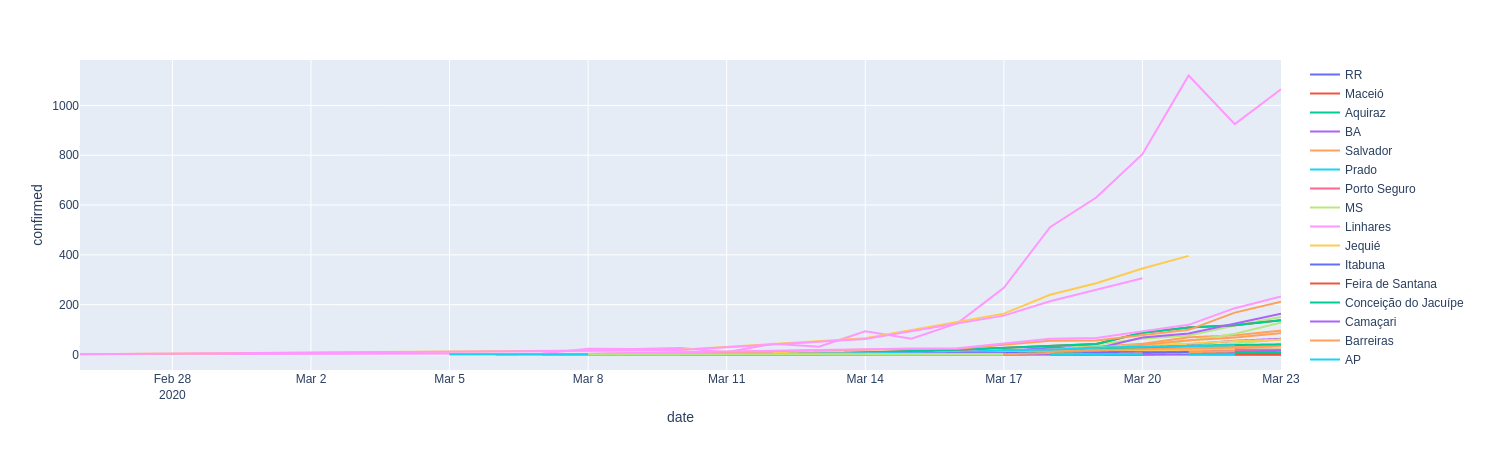

In [17]:
px.line(df,x='date',y='confirmed', color='city')

In [ ]:
for state in 
    trace = go.Scatter(
    name=dd[mask]['countryname'].str.replace('_',' ').tolist()[0],
    x=dd[mask]['since_first_day'], 
    y=dd[mask][var_col],
    #     line=dict(color='#a14900', width=wid),
    line=dict(width=wid),
    mode='lines+markers',
    marker=dict(size=marker_size),
    hoverlabel=dict(namelength=-1, font=dict(size=18))   
    )
    data.append(trace)

In [118]:
def total_casos(df,mask_countrys, escala='lin',var='cases',date=today, save=False):
    x_name = 
    y_name =

    trace = go.Scatter(
    name=dd[mask]['countryname'].str.replace('_',' ').tolist()[0],
    x=dd[mask]['since_first_day'], 
    y=dd[mask][var_col],
#     line=dict(color='#a14900', width=wid),
    line=dict(width=wid),
    mode='lines+markers',
    marker=dict(size=marker_size),
    hoverlabel=dict(namelength=-1, font=dict(size=18))   
    )
    data.append(trace)
        
    layout = go.Layout(
        barmode='stack',

        yaxis_title=y_name,
        yaxis = dict(

            tickfont=dict(
                size=22,
                color='black',
            ),
            tickformat=tick,
            type=tipo,
        ),
        xaxis_title=x_name,
        xaxis = dict(
            tickfont=dict(
                size=22,
                color='black',
            ),
    #         font = dict(size=20)

        ),

        title=dict(
            text=title,
            x=0.5,
            y=0.9,
            xanchor='center',
            yanchor='top',
            font = dict(
                size=22,
            )
        ),

        legend=go.layout.Legend(
            x=0.05,
            y=0.99,
    #         traceorder="normal",
            orientation='v',
            font=dict(
                family="sans-serif",
                size=20,
                color="black"
            ),
            bgcolor= 'rgba(0,0,0,0)' ,
    #         bordercolor="Black",
        #     borderwidth=2
        ),

        height = 800,

        width = largura,

        font=dict(
            size=18,
        )
    )

    fig = go.Figure(data=data, layout=layout)

    
    if save==True:
        if escala == 'lin':
            plot(fig, filename="../images/{}_lin.html".format(var_save), auto_open=False)
            plot(fig, filename="../../sample_pages/images/covid19/{}_lin.html".format(var_save), auto_open=False)
        elif escala=='log':
            plot(fig, filename="../images/{}_log.html".format(var_save), auto_open=False)
            plot(fig, filename="../../sample_pages/images/covid19/{}_log.html".format(var_save),auto_open=False)
    else:
        if escala == 'lin':
            fig.write_image("../images/pdf/{}_lin.pdf".format(var_save))
        elif escala=='log':
            fig.write_image("../images/pdf/{}_log.pdf".format(var_save))

    return(fig, dd)

array(['city', 'state'], dtype=object)

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities.csv')

In [48]:
df['city'] = df['city'].apply(lambda x : x[:-3])

## European Centre for Disease Prevention and Control 

- [Source - ECDPC](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)


In [28]:
df = pd.read_excel('../data/covid_18_03.xlsx')
mask = df['Cases']!=0
df = df[mask]

df.columns = normalize(df.columns)

df['count'] = 1

df['daterep'] = pd.to_datetime(df['daterep'])
df = df.sort_values(by='daterep')

total_casos = df[['cases','geoid']].groupby(by = ['geoid',]).cumsum()['cases'].tolist()
df['total_cases'] = total_casos

total_deaths = df[['deaths','geoid']].groupby(by = ['geoid',]).cumsum()['deaths'].tolist()
df['total_deaths'] = total_deaths

In [29]:
# since_case = 98
# mask = df['total_cases']>=since_case
# df = df[mask]


since_first_day = df[['count','geoid']].groupby(by = ['geoid',]).cumsum()['count'].tolist()
df['since_first_day'] = since_first_day

In [30]:
mask = (df['geoid']=='BR') | (df['geoid']=='IT') | (df['geoid']=='ES') | (df['geoid']=='US') | (df['geoid']=='CN') | (df['geoid']=='KR') | (df['geoid']=='UK') | (df['geoid']=='SG')

dd = df[mask]
dd['total_cases_log'] = np.log(dd['total_cases'])

In [42]:
data = []
wid = 6
marker_size = 10

for geoid in dd['geoid'].unique():
    
    mask = (dd['geoid']==geoid)

    trace = go.Scatter(
    name=dd[mask]['countries_and_territories'].str.replace('_',' ').tolist()[0],
    x=dd[mask]['since_first_day'], 
    y=dd[mask]['total_cases'],
#     line=dict(color='#a14900', width=wid),
    line=dict(width=wid),
    mode='lines+markers',
    marker=dict(size=marker_size),
    hoverlabel=dict(namelength=-1, font=dict(size=18))   
    )
    data.append(trace)

In [73]:
layout = go.Layout(
    barmode='stack',
    
    yaxis_title="<b>TOTAL CASES<b>",
    yaxis = dict(
        
        tickfont=dict(
            size=22,
            color='black',
        ),
#         tickformat='n',
        type="log",
    ),
    xaxis_title="<b>DAYS SINCE FIRST CASE<b>",
    xaxis = dict(
        tickfont=dict(
            size=22,
            color='black',
        ),
#         font = dict(size=20)

    ),

    title=dict(
        text='<b>COVID-19 - Total Confirmed Cases in {}</b>'.format(today),
        x=0.5,
        y=0.9,
        xanchor='center',
        yanchor='top',
        font = dict(
            size=22,
        )
    ),
    
    legend=go.layout.Legend(
        x=0.76,
        y=-0.0,
#         traceorder="normal",
        orientation='v',
        font=dict(
            family="sans-serif",
            size=20,
            color="black"
        ),
        bgcolor= 'rgba(0,0,0,0)' ,
#         bordercolor="Black",
    #     borderwidth=2
    ),
    
    height = 800,

#     width = 1600,
    
    font=dict(
        size=18,
    )
)
    
fig = go.Figure(data=data, layout=layout)



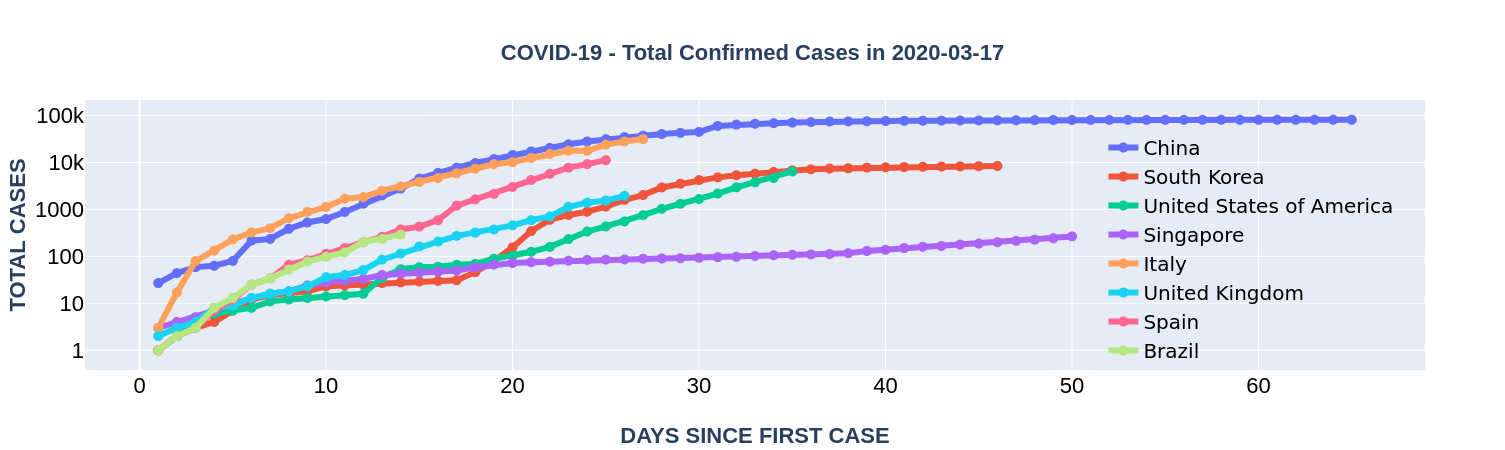

In [74]:
fig

In [75]:
lin=0

if lin == 1:
    plot(fig, filename="../images/total_lin.html", auto_open=False)
    plot(fig, filename="../../sample_pages/images/covid19/total_lin.html", auto_open=False)
else:
    plot(fig, filename="../images/total_log.html", auto_open=False)
    plot(fig, filename="../../sample_pages/images/covid19/total_log.html", auto_open=False)

In [ ]:
fig.write_image("../images/covid19_total_linear.pdf")


### API

- [TheVirusTracker](https://thevirustracker.com/api)

In [3]:
ajaxurl = 'https://thevirustracker.com/timeline/map-data.json'
r = requests.get(ajaxurl)

In [4]:
date = [] 
df = pd.DataFrame()
for i in range(len(r.json())):
    dd = pd.DataFrame.from_records(r.json()[i]['data'])
    dd['date'] = r.json()[i]['date']
    
    df = pd.concat([df,dd],axis=0)

In [5]:
columns = list(df.columns)[-1:] + list(df.columns)[:-1]
df = df[columns]

In [6]:
mask = df['totalcases']!=''

df = df[mask]

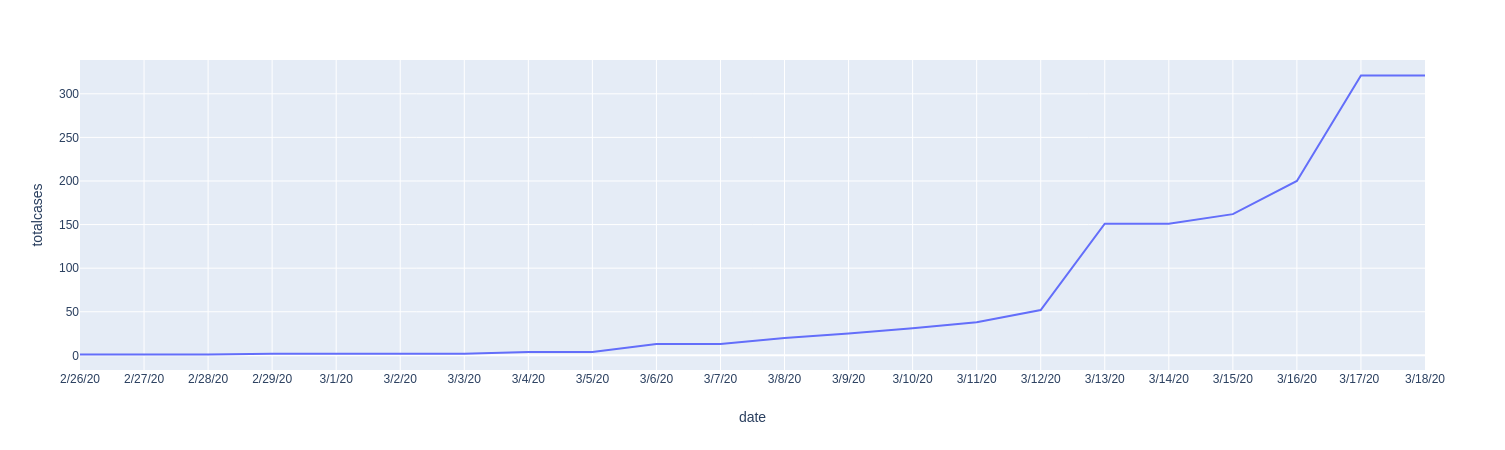

In [9]:
mask = df['countrycode']=='BR'

px.line(df[mask], x='date', y='totalcases')